<a href="https://colab.research.google.com/github/KalyanMohanty/Fruit_Classification/blob/main/cnn_model_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU

In [3]:

names = os.listdir("/content/drive/MyDrive/fruit dataset/")
print("Name of the Fruits and Category \n", names[0:6])
# Name of the Fruits and Category 
#  ['fresh bananas', 'fresh oranges', 'rotten apples', 'fresh apples', 'rotten bananas', 'rotten oranges']
images = []
x = []
y = []
for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit dataset/"+folder+"/"+file,target_size=(200,200))
    images.append(img)
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))

Name of the Fruits and Category 
 ['fresh bananas', 'fresh oranges', 'rotten apples', 'fresh apples', 'rotten bananas', 'rotten oranges']


In [4]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)
(850, 200, 200, 3)
(850,)
y = to_categorical(y)
print(y.shape)
(850, 6)
x = x/255

(850, 200, 200, 3)
(850,)
(850, 6)


# Model 1

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)

callback = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(200,200,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(64,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(128,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(256,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(180,activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(100,activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
his = model.fit(xtrain,ytrain,batch_size=64,epochs=50,validation_data=(xtest,ytest), verbose = 1, callbacks=[callback])
#categorical_crossentropy
# squared_hinge
#sparse_categorical_crossentropy
# kullback_leibler_divergence

Epoch 1/50
11/11 [==============================] - 29s 1s/step - loss: 2.1240 - accuracy: 0.1809 - val_loss: 1.7851 - val_accuracy: 0.2412
Epoch 2/50
11/11 [==============================] - 5s 461ms/step - loss: 1.6484 - accuracy: 0.2971 - val_loss: 1.4217 - val_accuracy: 0.3471
Epoch 3/50
11/11 [==============================] - 5s 464ms/step - loss: 1.2764 - accuracy: 0.4765 - val_loss: 1.3629 - val_accuracy: 0.4529
Epoch 4/50
11/11 [==============================] - 5s 462ms/step - loss: 1.0678 - accuracy: 0.6059 - val_loss: 1.0776 - val_accuracy: 0.6000
Epoch 5/50
11/11 [==============================] - 5s 466ms/step - loss: 0.9016 - accuracy: 0.6603 - val_loss: 0.8544 - val_accuracy: 0.6824
Epoch 6/50
11/11 [==============================] - 5s 465ms/step - loss: 0.7056 - accuracy: 0.7485 - val_loss: 0.5685 - val_accuracy: 0.7882
Epoch 7/50
11/11 [==============================] - 5s 465ms/step - loss: 0.5646 - accuracy: 0.8000 - val_loss: 0.5356 - val_accuracy: 0.7765
Epoch 8/

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 98, 98, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 94, 94, 128)       147584    
                                                        

In [7]:

model.save('/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/cnn_tunned_final_model.h5')

# predict

In [10]:
import cv2
import numpy as np
img = cv2.imread('/content/drive/MyDrive/fruit dataset/fresh apples/rotated_by_15_Screen Shot 2018-06-08 at 5.18.16 PM.png')
img = cv2.resize(img,(200, 200))
img = np.reshape(img,[1,200, 200,3])

classes = model.predict(img)

print(classes)

[[0. 0. 0. 1. 0. 0.]]


In [16]:
fruit_category = ['fresh bananas', 'fresh oranges', 'rotten apples', 'fresh apples', 'rotten bananas', 'rotten oranges']
 
import json
def model_prediction():
  j = 0
  # json_celeb_name = []
  while True:
    if classes[0][j] == 1.0:
      index = j + 1
      category = {
    'Model prediction':{
        'ID': index,
        'Name':fruit_category[j]
                        }
    }
      # print('Index number is:',index)
      # print(caleb_name)
      json_object = json.dumps(category, indent =4) 
      print(json_object)
      # json_celeb_name.append(caleb_name)
    j = j +1
    if j == 6:
      break


In [17]:
 model_prediction()

{
    "Model prediction": {
        "ID": 4,
        "Name": "fresh apples"
    }
}


In [8]:
import tensorflow as tf
TF_LITE_MODEL_FILE_NAME = '/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/tf_lite_model.tflite'
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

tf_lite_model_name = TF_LITE_MODEL_FILE_NAME
open(tf_lite_model_name, 'wb').write(tflite_model)


INFO:tensorflow:Assets written to: /tmp/tmpv8mgp469/assets


INFO:tensorflow:Assets written to: /tmp/tmpv8mgp469/assets


85949184

In [ ]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), 'KB')

File size: 83934.75 Kilobytes


# Check Tensor shape

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 200 200   3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 6]
Output Type: <class 'numpy.float32'>


In [ ]:
# import cv2
# img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/test1.png')
# tf_model_predictions = tflite_model.predict(img)

# Plot Model

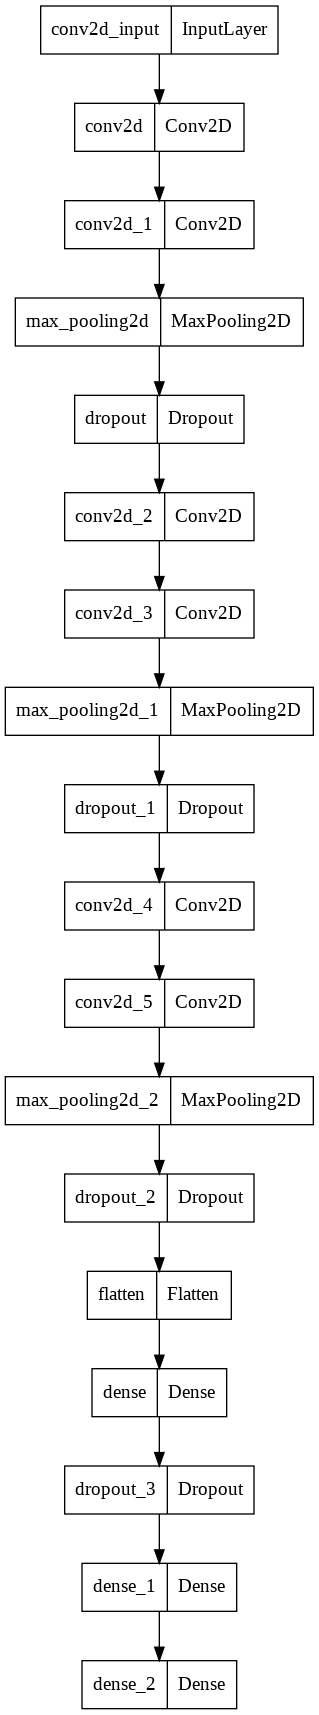

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    to_file="/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/cnn_tunned_model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
)

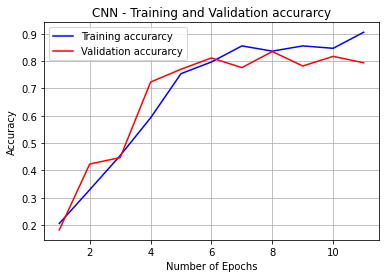

In [ ]:
#get the details form the history object
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('CNN - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Accuracy_14_epoch.png")

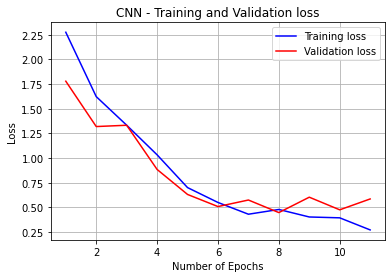

In [ ]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Loss_15_epoch.png")

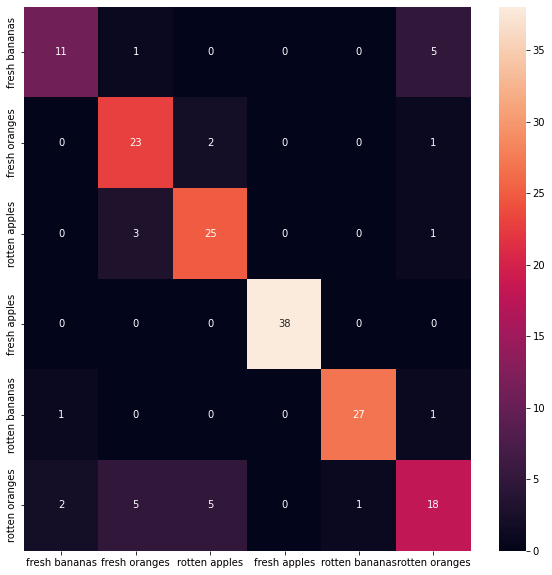

[[11  1  0  0  0  5]
 [ 0 23  2  0  0  1]
 [ 0  3 25  0  0  1]
 [ 0  0  0 38  0  0]
 [ 1  0  0  0 27  1]
 [ 2  5  5  0  1 18]]


<Figure size 432x288 with 0 Axes>

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()
print(conf_mat)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/confusion_matrix_14_epochs.png")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification Report')
print(classification_report(y_true,y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        17
           1       0.72      0.88      0.79        26
           2       0.78      0.86      0.82        29
           3       1.00      1.00      1.00        38
           4       0.96      0.93      0.95        29
           5       0.69      0.58      0.63        31

    accuracy                           0.84       170
   macro avg       0.82      0.82      0.82       170
weighted avg       0.84      0.84      0.83       170



In [ ]:
# Quantized tflite model

# **New Dataset - kaggle**

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LeakyReLU


In [ ]:
names = os.listdir("/content/drive/MyDrive/fruit_dataset_final/")
print("Name of the Fruits and Category \n", names[0:6])

Name of the Fruits and Category 
 ['fresh apples', 'fresh bananas', 'fresh oranges', 'rotten apples', 'rotten bananas', 'rotten oranges']


In [ ]:
images = []
x = []
y = []
for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit_dataset_final/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit_dataset_final/"+folder+"/"+file,target_size=(50,50))
    images.append(img)
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))

x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

y = to_categorical(y)
print(y.shape)

x = x/255

(10125, 50, 50, 3)
(10125,)
(10125, 6)


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=5)

callback = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),input_shape=(50,50,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(64,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(128,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(256,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.Conv2D(256,(3,3),activation=LeakyReLU(alpha=0.01)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(180,activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(100,activation=LeakyReLU(alpha=0.01)))
model.add(layers.Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
his = model.fit(xtrain,ytrain,batch_size=64,epochs=50,validation_data=(xtest,ytest), verbose = 1, callbacks=[callback])
#categorical_crossentropy
# squared_hinge
#sparse_categorical_crossentropy
# kullback_leibler_divergence

model.summary()


Epoch 1/50
143/143 [==============================] - 10s 63ms/step - loss: 1.1354 - accuracy: 0.5297 - val_loss: 0.6031 - val_accuracy: 0.7947
Epoch 2/50
143/143 [==============================] - 8s 59ms/step - loss: 0.5076 - accuracy: 0.8250 - val_loss: 0.3049 - val_accuracy: 0.9013
Epoch 3/50
143/143 [==============================] - 8s 58ms/step - loss: 0.3742 - accuracy: 0.8714 - val_loss: 0.2872 - val_accuracy: 0.8894
Epoch 4/50
143/143 [==============================] - 8s 59ms/step - loss: 0.2904 - accuracy: 0.9002 - val_loss: 0.2554 - val_accuracy: 0.9062
Epoch 5/50
143/143 [==============================] - 8s 58ms/step - loss: 0.2503 - accuracy: 0.9109 - val_loss: 0.2174 - val_accuracy: 0.9299
Epoch 6/50
143/143 [==============================] - 8s 58ms/step - loss: 0.1875 - accuracy: 0.9314 - val_loss: 0.1623 - val_accuracy: 0.9408
Epoch 7/50
143/143 [==============================] - 8s 58ms/step - loss: 0.1898 - accuracy: 0.9342 - val_loss: 0.1985 - val_accuracy: 0.941

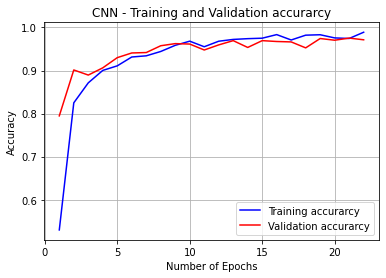

In [ ]:
#get the details form the history object

acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('CNN - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

# plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Accuracy_14_epoch.png")



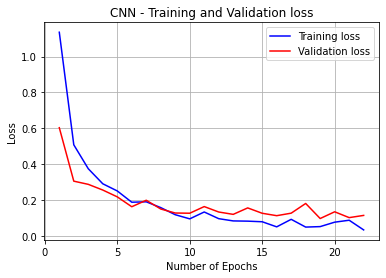

In [ ]:

plt.figure()
#Train and validation loss

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('CNN - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

# plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/cnn_tuning/CNN_Loss_15_epoch.png")

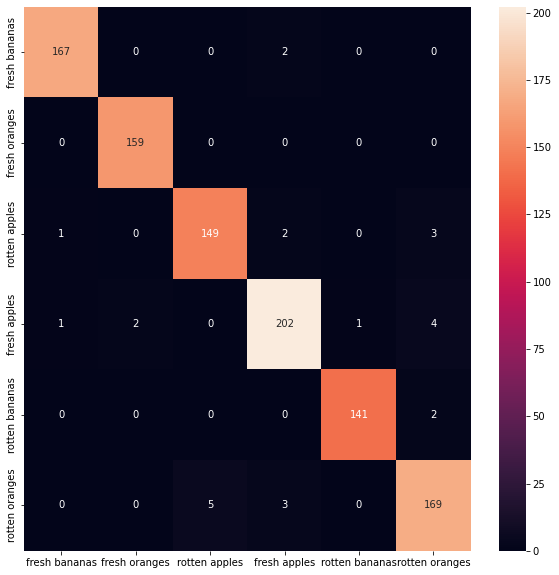

[[167   0   0   2   0   0]
 [  0 159   0   0   0   0]
 [  1   0 149   2   0   3]
 [  1   2   0 202   1   4]
 [  0   0   0   0 141   2]
 [  0   0   5   3   0 169]]


<Figure size 432x288 with 0 Axes>

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()
print(conf_mat)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/confusion_matrix_100_epochs.png")

In [ ]:
print('Classification Report')
print(classification_report(y_true,y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       169
           1       0.99      1.00      0.99       159
           2       0.97      0.96      0.96       155
           3       0.97      0.96      0.96       210
           4       0.99      0.99      0.99       143
           5       0.95      0.95      0.95       177

    accuracy                           0.97      1013
   macro avg       0.98      0.98      0.98      1013
weighted avg       0.97      0.97      0.97      1013



# RESNET50   
- image size 50, 50
- test size 0.1

In [ ]:
from tensorflow.keras.applications import resnet50
model2 = resnet50.ResNet50(weights='imagenet')
#new_model.summary()
input_layer = layers.Input(shape=(50, 50, 3))
model2 = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)
#model2.summary()
last_layer = model2.output
flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)
resnet50_model = models.Model(inputs=input_layer,outputs=output_layer)
#new_model.summary()
for layer in resnet50_model.layers[:-1]:
 layer.trainable=False
#new_model.summary()
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1,random_state=5)
callback = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)

reshis = resnet50_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
reshis = resnet50_model.fit(xtrain,ytrain,batch_size=64,epochs=50,validation_data=(xtest,ytest), callbacks=[callback])

#xtrain,xtest,ytrain,ytest

Epoch 1/50
143/143 [==============================] - 14s 69ms/step - loss: 1.5646 - accuracy: 0.3745 - val_loss: 1.4473 - val_accuracy: 0.4265
Epoch 2/50
143/143 [==============================] - 8s 57ms/step - loss: 1.3595 - accuracy: 0.4802 - val_loss: 1.3221 - val_accuracy: 0.4886
Epoch 3/50
143/143 [==============================] - 8s 59ms/step - loss: 1.2687 - accuracy: 0.5282 - val_loss: 1.2599 - val_accuracy: 0.5271
Epoch 4/50
143/143 [==============================] - 9s 61ms/step - loss: 1.2098 - accuracy: 0.5552 - val_loss: 1.2100 - val_accuracy: 0.5360
Epoch 5/50
143/143 [==============================] - 8s 59ms/step - loss: 1.1695 - accuracy: 0.5676 - val_loss: 1.1690 - val_accuracy: 0.5439
Epoch 6/50
143/143 [==============================] - 8s 58ms/step - loss: 1.1300 - accuracy: 0.5896 - val_loss: 1.2140 - val_accuracy: 0.4877
Epoch 7/50
143/143 [==============================] - 8s 59ms/step - loss: 1.1062 - accuracy: 0.5949 - val_loss: 1.1019 - val_accuracy: 0.585

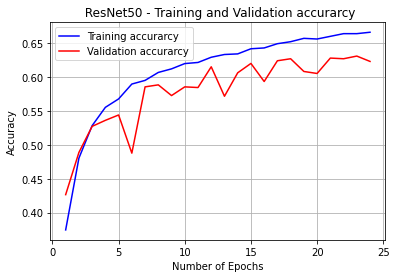

In [ ]:
#get the details form the history object
acc = reshis.history['accuracy']
val_acc = reshis.history['val_accuracy']
loss = reshis.history['loss']
val_loss = reshis.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title(' ResNet50 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/ResNet50_accuracy.png")



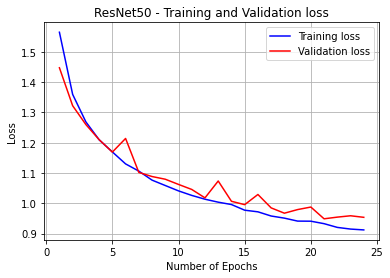

In [ ]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('ResNet50 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/Resnet50_Loss.png")

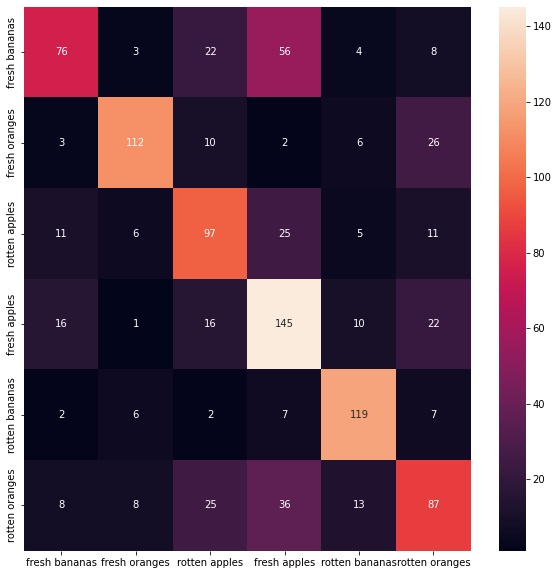

[[ 76   3  22  56   4   8]
 [  3 112  10   2   6  26]
 [ 11   6  97  25   5  11]
 [ 16   1  16 145  10  22]
 [  2   6   2   7 119   7]
 [  8   8  25  36  13  87]]


<Figure size 432x288 with 0 Axes>

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=resnet50_model.predict(xtest)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(ytest,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()
print(conf_mat)
plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/confusion_matrix_100_epochs.png")

VGG16
- image size 50, 50
- test size 0.1

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,random_state=5)
from keras.applications.vgg16 import VGG16
model3 = VGG16(weights='imagenet')

In [ ]:
input_layer = layers.Input(shape=(50, 50,3))
model3 = VGG16(weights='imagenet',include_top=False,input_tensor=input_layer)
last_layer = model3.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

vgg16_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in vgg16_model.layers[:-1]:
  layer.trainable=False

callback = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)
vgg16_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
vgg16_history = vgg16_model.fit(X_train,Y_train,batch_size=64,epochs=50,validation_data=(X_test,Y_test), callbacks=[callback])


Epoch 1/50
143/143 [==============================] - 10s 58ms/step - loss: 1.1774 - accuracy: 0.5754 - val_loss: 0.9113 - val_accuracy: 0.6723
Epoch 2/50
143/143 [==============================] - 7s 52ms/step - loss: 0.7753 - accuracy: 0.7366 - val_loss: 0.7354 - val_accuracy: 0.7394
Epoch 3/50
143/143 [==============================] - 7s 52ms/step - loss: 0.6537 - accuracy: 0.7783 - val_loss: 0.6494 - val_accuracy: 0.7700
Epoch 4/50
143/143 [==============================] - 8s 53ms/step - loss: 0.5855 - accuracy: 0.8055 - val_loss: 0.5863 - val_accuracy: 0.7996
Epoch 5/50
143/143 [==============================] - 7s 52ms/step - loss: 0.5388 - accuracy: 0.8227 - val_loss: 0.5459 - val_accuracy: 0.8105
Epoch 6/50
143/143 [==============================] - 8s 53ms/step - loss: 0.5036 - accuracy: 0.8343 - val_loss: 0.5226 - val_accuracy: 0.8124
Epoch 7/50
143/143 [==============================] - 7s 52ms/step - loss: 0.4769 - accuracy: 0.8426 - val_loss: 0.4919 - val_accuracy: 0.832

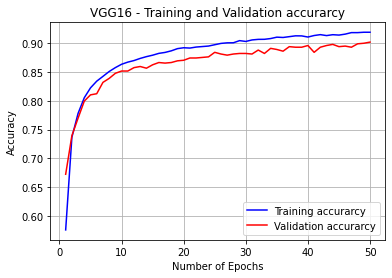

In [ ]:
acc = vgg16_history.history['accuracy']
val_acc = vgg16_history.history['val_accuracy']
loss = vgg16_history.history['loss']
val_loss = vgg16_history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('VGG16 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

# plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG16_Accuracy.png")

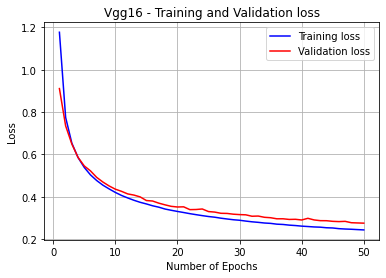

In [ ]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Vgg16 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG16_Loss.png")

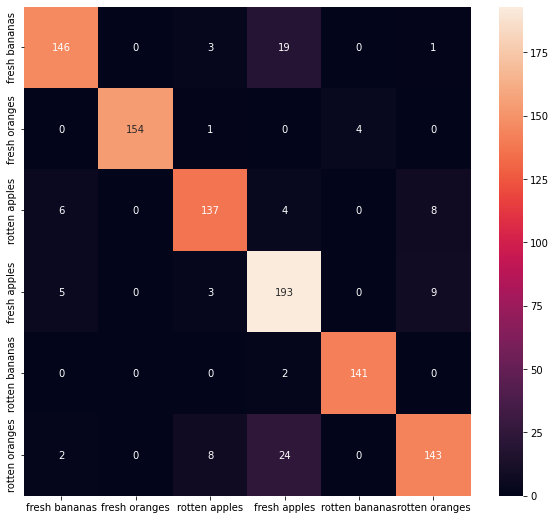

[[146   0   3  19   0   1]
 [  0 154   1   0   4   0]
 [  6   0 137   4   0   8]
 [  5   0   3 193   0   9]
 [  0   0   0   2 141   0]
 [  2   0   8  24   0 143]]


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred_vgg16=vgg16_model.predict(X_test)
y_pred_classes_vgg16=np.argmax(y_pred_vgg16,axis=1)
y_true_vgg16=np.argmax(Y_test,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true_vgg16,y_pred_classes_vgg16)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()
print(confusion_matrix(y_true_vgg16,y_pred_classes_vgg16))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification Report')
print(classification_report(y_true_vgg16,y_pred_classes_vgg16))

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       169
           1       1.00      0.97      0.98       159
           2       0.90      0.88      0.89       155
           3       0.80      0.92      0.85       210
           4       0.97      0.99      0.98       143
           5       0.89      0.81      0.85       177

    accuracy                           0.90      1013
   macro avg       0.91      0.90      0.91      1013
weighted avg       0.91      0.90      0.90      1013



# VGG19

In [ ]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(x,y,test_size=0.1,random_state=5)
from keras.applications.vgg19 import VGG19
model4 = VGG19(weights='imagenet')

input_layer = layers.Input(shape=(50, 50,3))
model4 = VGG19(weights='imagenet',include_top=False,input_tensor=input_layer)

last_layer = model4.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

vgg19_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in vgg19_model.layers[:-1]:
  layer.trainable=False

callback = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)
vgg19_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
vgg19_history = vgg19_model.fit(X_Train,Y_Train,batch_size=64,epochs=50,validation_data=(X_Test,Y_Test), callbacks=[callback])

Epoch 1/50
143/143 [==============================] - 10s 66ms/step - loss: 1.2212 - accuracy: 0.5542 - val_loss: 0.9100 - val_accuracy: 0.6831
Epoch 2/50
143/143 [==============================] - 9s 63ms/step - loss: 0.7878 - accuracy: 0.7344 - val_loss: 0.7331 - val_accuracy: 0.7423
Epoch 3/50
143/143 [==============================] - 9s 64ms/step - loss: 0.6617 - accuracy: 0.7744 - val_loss: 0.6496 - val_accuracy: 0.7670
Epoch 4/50
143/143 [==============================] - 9s 64ms/step - loss: 0.5934 - accuracy: 0.7989 - val_loss: 0.5983 - val_accuracy: 0.7789
Epoch 5/50
143/143 [==============================] - 9s 64ms/step - loss: 0.5487 - accuracy: 0.8113 - val_loss: 0.5621 - val_accuracy: 0.7976
Epoch 6/50
143/143 [==============================] - 9s 64ms/step - loss: 0.5160 - accuracy: 0.8274 - val_loss: 0.5331 - val_accuracy: 0.8055
Epoch 7/50
143/143 [==============================] - 9s 64ms/step - loss: 0.4914 - accuracy: 0.8343 - val_loss: 0.5115 - val_accuracy: 0.813

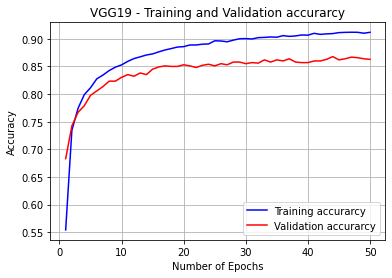

In [ ]:
#get the details form the history object
acc = vgg19_history.history['accuracy']
val_acc = vgg19_history.history['val_accuracy']
loss = vgg19_history.history['loss']
val_loss = vgg19_history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('VGG19 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG19_Accuracy.png")

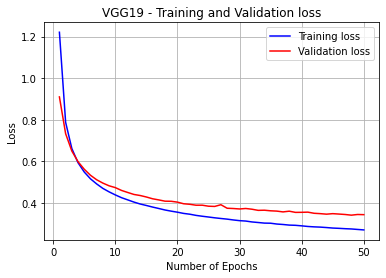

In [ ]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('VGG19 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/VGG19_Loss.png")

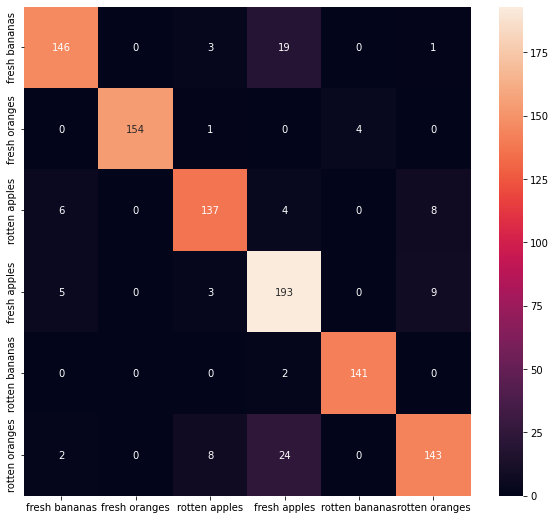

Confusion Matrix:
 [[144   0   4  19   0   2]
 [  0 154   0   0   5   0]
 [  7   0 130   5   0  13]
 [ 11   0   5 177   0  17]
 [  0   3   0   2 137   1]
 [  1   0   6  35   3 132]]


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
vgg19_y_pred=vgg19_model.predict(X_Test)
vgg19_y_pred_classes=np.argmax(vgg19_y_pred,axis=1)
vgg19_y_true=np.argmax(Y_Test,axis=1)
#compute conf mat
conf_mat_vgg19=confusion_matrix(vgg19_y_true,vgg19_y_pred_classes)
#plot the con mat
fruit_names=['fresh bananas',
 'fresh oranges',
 'rotten apples',
 'fresh apples',
 'rotten bananas',
 'rotten oranges']
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()
print('Confusion Matrix:\n',conf_mat_vgg19)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print('Classification Report')
print(classification_report(vgg19_y_true,vgg19_y_pred_classes))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       169
           1       0.98      0.97      0.97       159
           2       0.90      0.84      0.87       155
           3       0.74      0.84      0.79       210
           4       0.94      0.96      0.95       143
           5       0.80      0.75      0.77       177

    accuracy                           0.86      1013
   macro avg       0.87      0.87      0.87      1013
weighted avg       0.87      0.86      0.86      1013



# InceptionResNetV2

In [ ]:

names = os.listdir("/content/drive/MyDrive/fruit dataset/")
print("Name of the Fruits and Category \n", names[0:6])
# Name of the Fruits and Category 
#  ['fresh bananas', 'fresh oranges', 'rotten apples', 'fresh apples', 'rotten bananas', 'rotten oranges']
images = []
x = []
y = []
for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit dataset/"+folder+"/"+file,target_size=(200,200))
    images.append(img)
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))

Name of the Fruits and Category 
 ['fresh bananas', 'fresh oranges', 'rotten apples', 'fresh apples', 'rotten bananas', 'rotten oranges']


In [ ]:
import tensorflow as tf
from keras.applications.inception_resnet_v2 import InceptionResNetV2
XTrain,XTest,YTrain,YTest = train_test_split(x,y,test_size=0.1,random_state=5)
input_layer = layers.Input(shape=(200, 200,3))
model5 = InceptionResNetV2(weights='imagenet',include_top=False,input_tensor=input_layer)

last_layer = model5.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

v2_new_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in v2_new_model.layers[:-1]:
  layer.trainable=False
callback = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 3, verbose = 1,restore_best_weights = True)
v2_new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
v2_history = v2_new_model.fit(XTrain,YTrain,batch_size=64,epochs=50,validation_data=(XTest,YTest), callbacks=[callback])

In [ ]:
#get the details form the history object
acc = v2_history.history['accuracy']
val_acc = v2_history.history['val_accuracy']
loss = v2_history.history['loss']
val_loss = v2_history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('InceptionResnetV2 - Training and Validation accurarcy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/InceptionResNetV2_Accuracy.png")

In [ ]:
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('InceptionResNetv2 - Training and Validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()

plt.savefig("/content/drive/MyDrive/Colab Notebooks/Fruit Classification Notebook/plots/InceptionResNetV2_Loss.png")


In [ ]:
# #confusion matrix
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# v2_y_pred=v2_model.predict(XTest)
# v2_pred_classes=np.argmax(v2_y_pred,axis=1)
# v2_y_true=np.argmax(YTest,axis=1)
# #compute conf mat
# conf_mat_v2=confusion_matrix(v2_y_true,v2_pred_classes)
# #plot the con mat
# fruit_names=['fresh bananas',
#  'fresh oranges',
#  'rotten apples',
#  'fresh apples',
#  'rotten bananas',
#  'rotten oranges']
# f,ax=plt.subplots(figsize=(10,9))
# sns.heatmap(conf_mat,annot=True,fmt='.0f')
# ax.set_xticklabels(fruit_names)
# ax.set_yticklabels(fruit_names)
# plt.show()
# print('Confusion Matrix:\n',conf_mat_v2)

In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report
# print('Classification Report')
# print(classification_report(v2_y_true,v2_pred_classes))